In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
data = pd.read_csv('data/diabetes.csv')
print(data.shape)
data.head()

# Dataset from: https://www.kaggle.com/code/towfeeqf/diabetes-prediction-ml/data

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Logistic Regression on Original dataset

Split original dataset

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
logreg.fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.778
Test set score: 0.729


C:\Users\Roberto\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Roberto\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

#### Fixing warning above with max_iter

In [64]:
logreg = LogisticRegression(random_state=42, max_iter=1000, C=10).fit(X_train, y_train)
logreg.fit(X_train, y_train)
# Added C regularization parameter

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

# https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

Training set score: 0.783
Test set score: 0.729


### Normalization MinMax Feature Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [86]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Split normalized dataset**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state=42)

### Logistic Regression on normalized dataset

In [88]:
logreg_norm = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
logreg_norm.fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg_norm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg_norm.score(X_test, y_test)))

Training set score: 0.766
Test set score: 0.745


### Adding Regularization parameter

In [89]:
C_vals = [0.01, 0.1, 1, 10, 20, 25]
acc_scores = []

for c in C_vals:

    logreg_C = LogisticRegression(random_state=42, max_iter=1000, C=c).fit(X_train, y_train)
    acc_scores.append((round(logreg_C.score(X_test, y_test), 3)))

print(acc_scores)
# print("Training set score: {:.3f}".format(logreg2.score(X_train, y_train)))
# print("Test set score: {:.3f}".format(logreg2.score(X_test, y_test)))

[0.641, 0.682, 0.745, 0.724, 0.729, 0.724]


In [90]:
print('Max accuracy:', max(acc_scores), ',', 'C_value:', C_vals[acc_scores.index(max(acc_scores))])

Max accuracy: 0.745 , C_value: 1


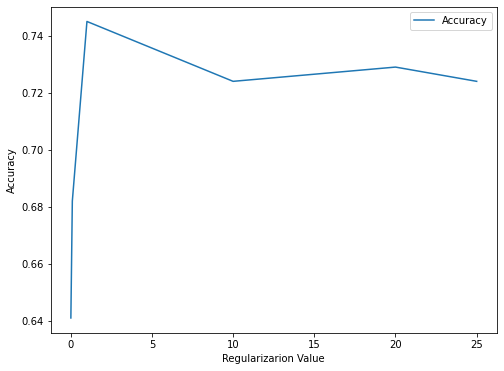

In [91]:
plt.figure(figsize=(8, 6))

plt.plot(C_vals, acc_scores, label='Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Regularizarion Value")
plt.legend()

plt.show()

# Support Vector Machine on Normalized dataset

In [106]:
from sklearn.svm import SVC

svc = SVC(random_state=42).fit(X_train, y_train)
# y_pred = svc.predict(X_test)

print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, y_test)))

Training set score: 0.790
Test set score: 0.755
